## seaborn - predefined plots

- Viloinplot - boxplot에 distribution을 함께 표현
- stripplot - scatter 와 category 정보를 함께 표현
- Swarmplot - 분포와 함께 scatter를 함께 표현
- Pointplot - category 별로 numeric의 평균, 신뢰구간 표시
- regplot - scatter + 선형함수를 함께 표시

## Violinplot - boxplot에 distribution을 함께 표현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')
fmri = sns.load_dataset('fmri')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: xlabel='total_bill'>

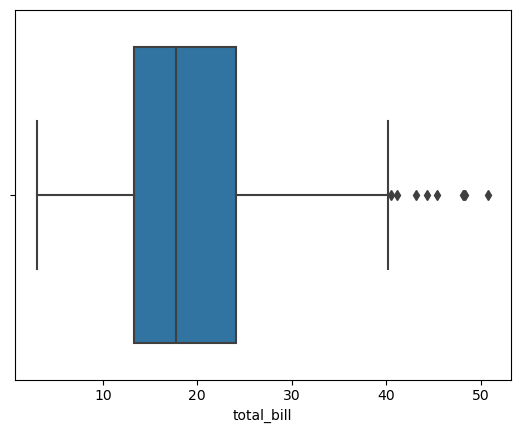

In [6]:
# boxplot
sns.boxplot(x=tips['total_bill'])

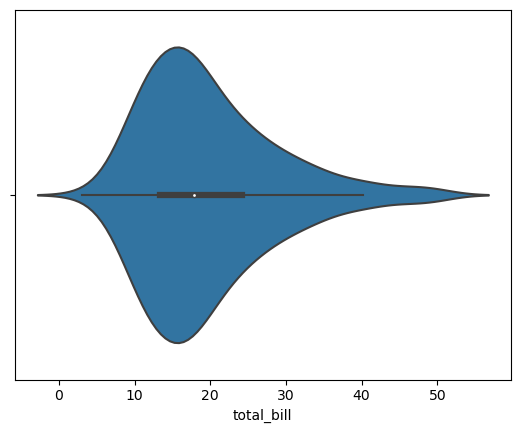

In [8]:
# violinplot
ax = sns.violinplot(x=tips["total_bill"])

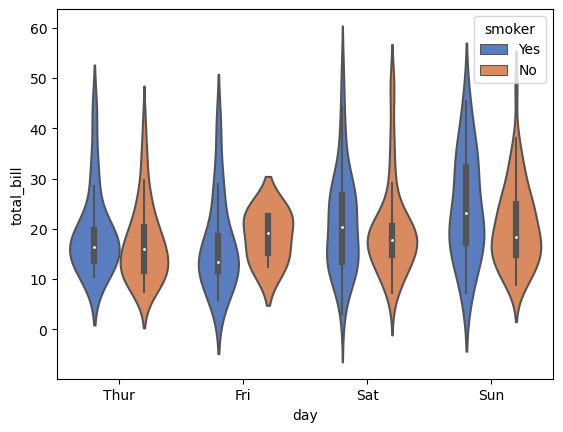

In [14]:
# violinplot - x축과 Y축, hue까지 지정
ax = sns.violinplot(x='day', y = 'total_bill', hue='smoker', data=tips, palette='muted')

## Swarmplot - 분포와 함께 scatter 를 함께 표현

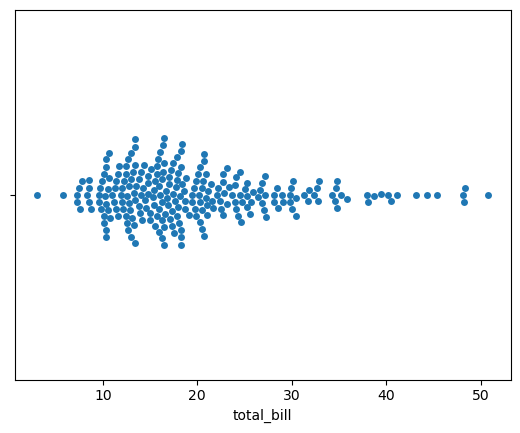

In [19]:
# violinplot과 비슷하지만 조금 더 명확하게 데이터가 어디에 있는지 볼 수 있음
ax = sns.swarmplot(x=tips["total_bill"])

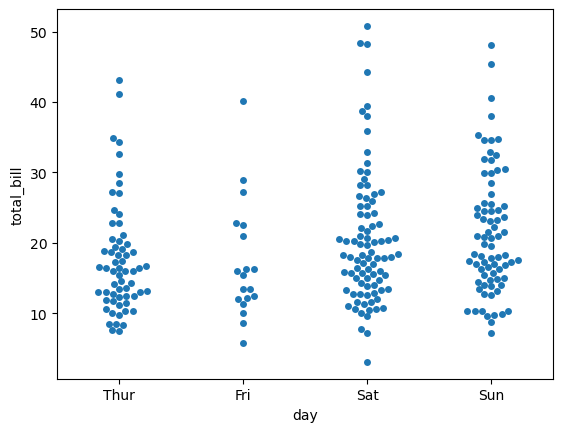

In [17]:
ax = sns.swarmplot(x='day', y='total_bill', data=tips)

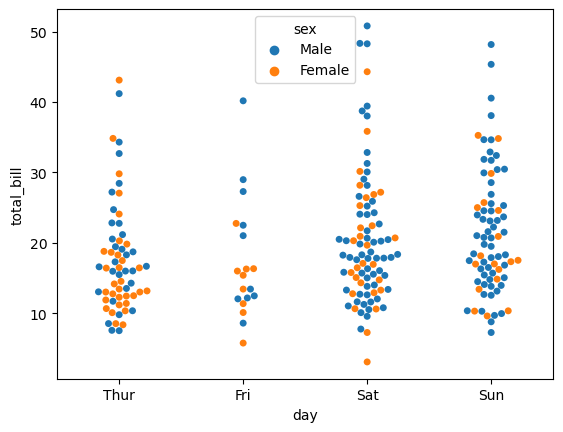

In [20]:
# 한번에 찍어주기 때문에 어디에 어느 데이터가 많은지 한눈에 들어옴
ax = sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)

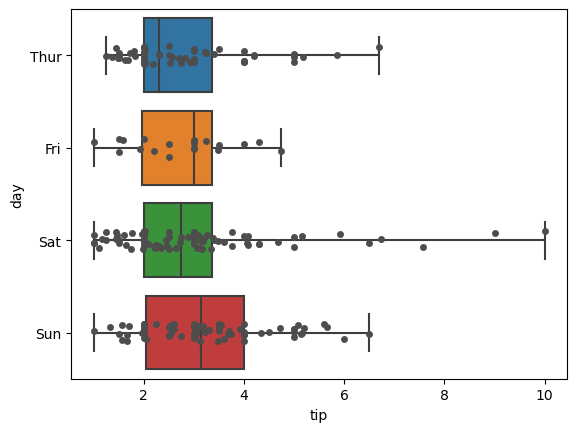

In [25]:
# stripplot과 boxplot을 한번에 표현 가능
ax = sns.boxplot(x='tip', y='day', data=tips, whis = np.inf)
ax = sns.stripplot(x='tip', y='day', data=tips, color='.3')

## Pointplot - category 별로 numeric의 평균, 신뢰구간 표시

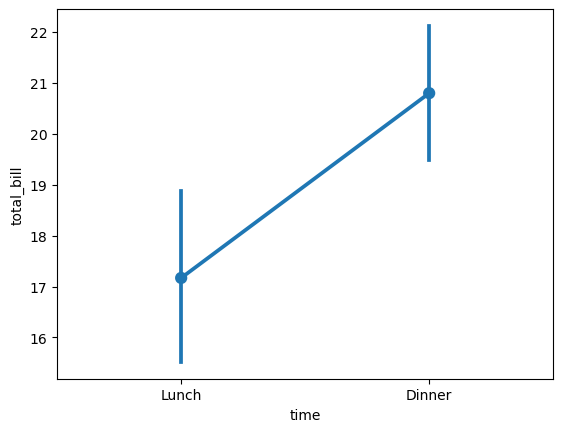

In [28]:
# lunch와 dinner의 평균값을 비교한 것
ax = sns.pointplot(x="time", y='total_bill', data=tips)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


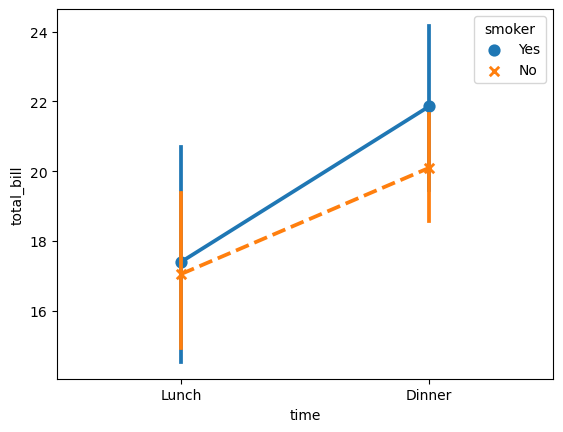

In [30]:
# 흡연자와 비흡연자가 lunch 와 dinner에 사용한 bills에 대한 비교
ax = sns.pointplot(x='time', y='total_bill', hue='smoker',
                  data=tips,
                  markers=['o','x'],
                  linestyles=['-', '--'])

## regplot - scatter + 선형함수를 함께 표시

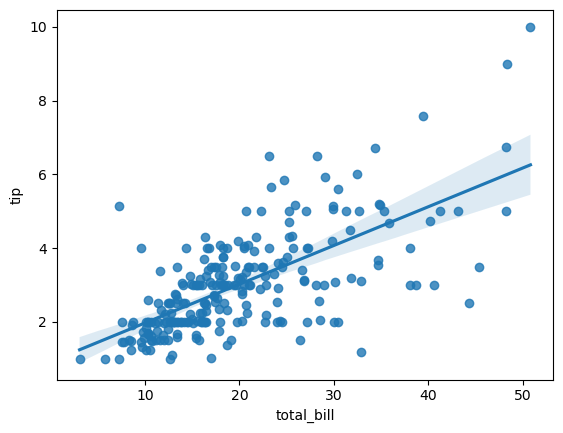

In [33]:
ax = sns.regplot(x='total_bill', y='tip', data=tips)

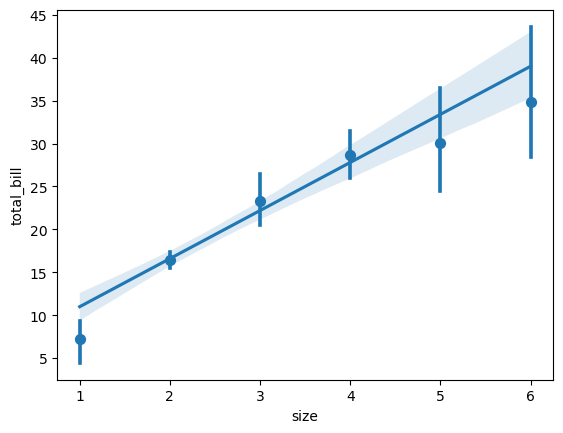

In [39]:
# x_estimator=np.mean를 해주면 size 별로 평균값을 보여줌
ax = sns.regplot(x='size', y='total_bill', data=tips,
                x_estimator=np.mean)

## seaborn - multiple plots

- 한 개 이상의 도표를 하나의 plot에 작성
- Axes를 사용해서 grid를 나누는 방법

## seaborn - predefined multiple plots

- replot - Numeric 데이터 중심의 분포/선형 표시
- catplot - category 데이터 중심의 표시
- FacetGrid - 특정 조건에 따른 다양한 plot을 grid로 표시
- pairplot - 데이터 간의 상관관계 표시
- lmplot - regression 모델과 category 데이터를 함께 표시

## relplot

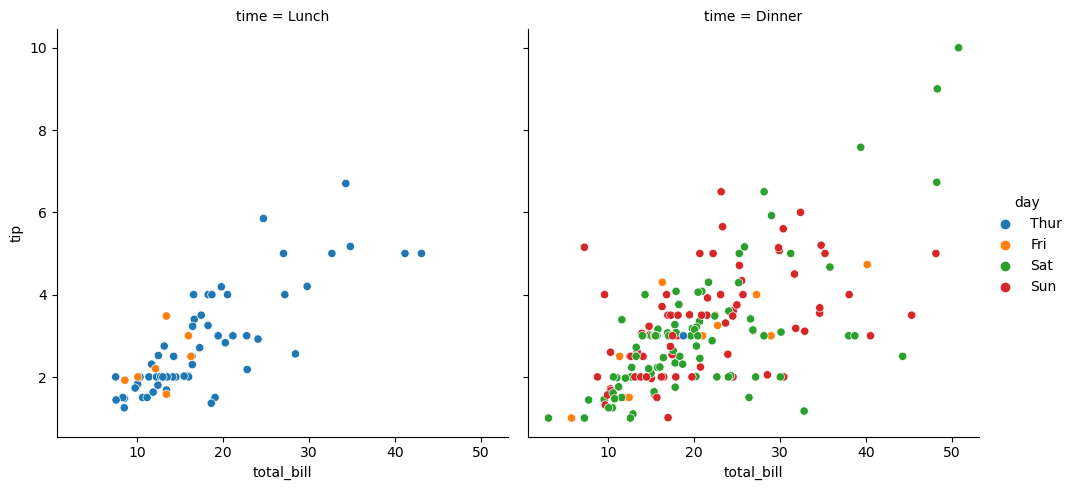

In [41]:
g = sns.relplot(x='total_bill', y='tip', hue='day', col='time', data=tips)

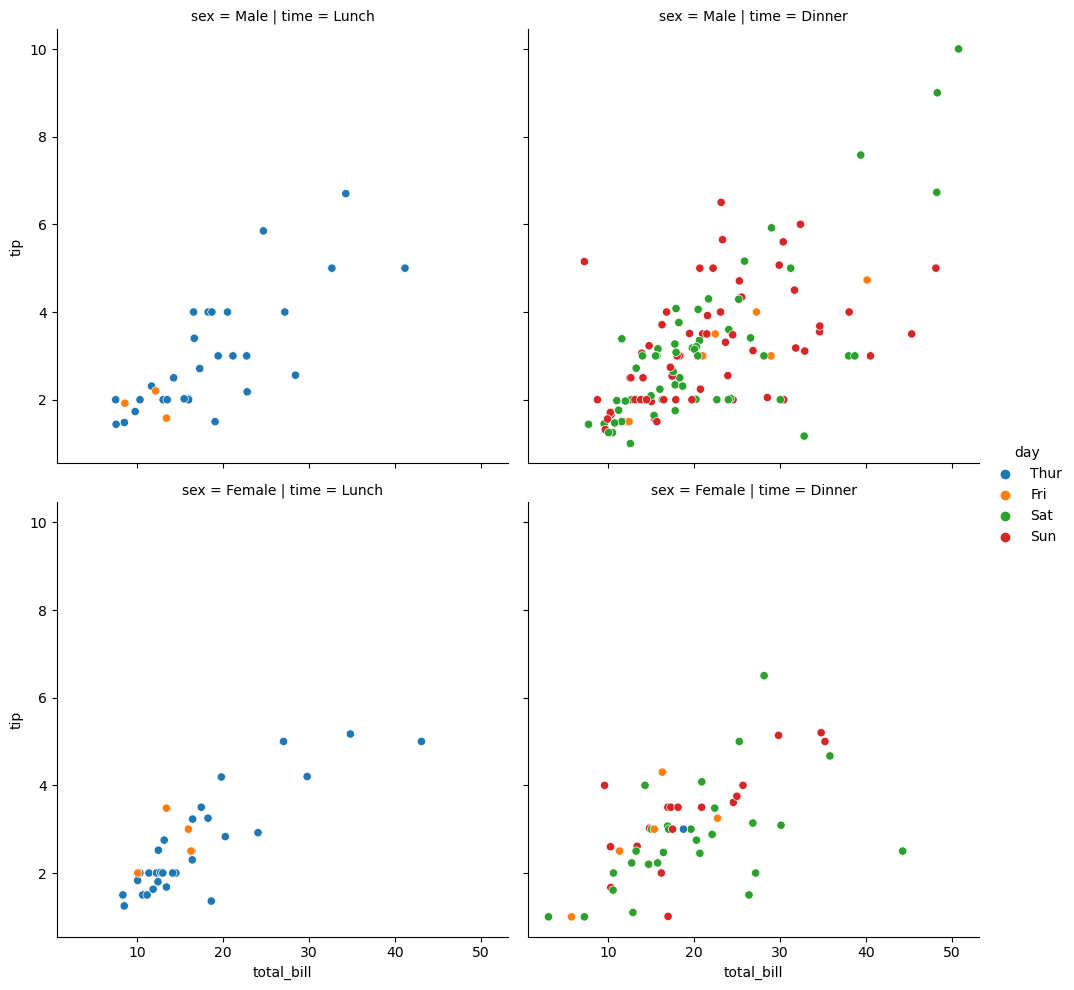

In [42]:
g = sns.relplot(x = 'total_bill', y = 'tip', hue = 'day', col = 'time', row='sex', data=tips)

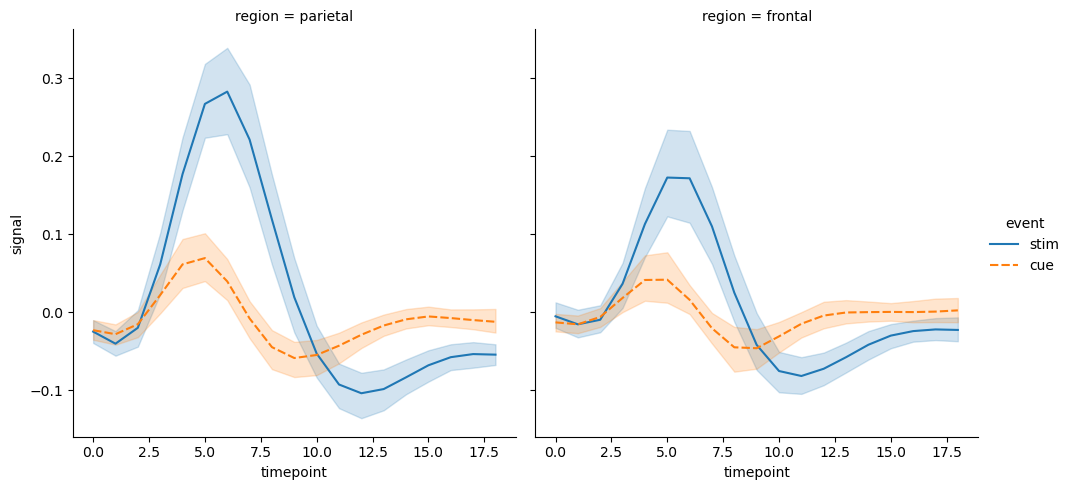

In [43]:
g = sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', col = 'region', kind = 'line', data=fmri)

## catplot - category 데이터 중심의 표시

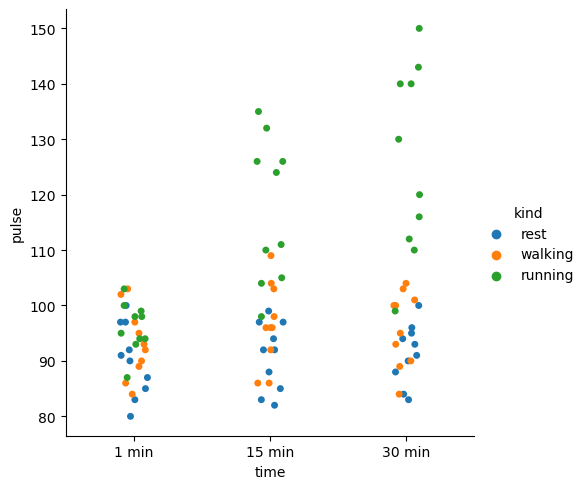

In [44]:
exercies = sns.load_dataset("exercise")
g = sns.catplot(x='time', y='pulse', hue='kind', data=exercies)

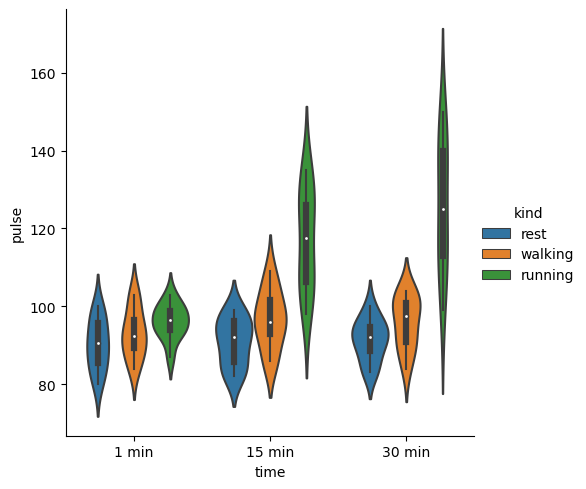

In [45]:
g = sns.catplot(x='time', y='pulse', hue='kind', data=exercies, kind = 'violin')

In [48]:
titanic = sns.load_dataset("./data/titanic/gender_submission.csv")
g = sns.catplot("alive", col = 'deck', col_wrap = 4,
               data = titanic[titanic.deck.notnull()],
               kind = "count", height = 2.5, aspect = .8)

ValueError: './data/titanic/gender_submission.csv' is not one of the example datasets.

## FacetGrid - 특정 조건에 따른 다양한 Plot을 grid로 표시

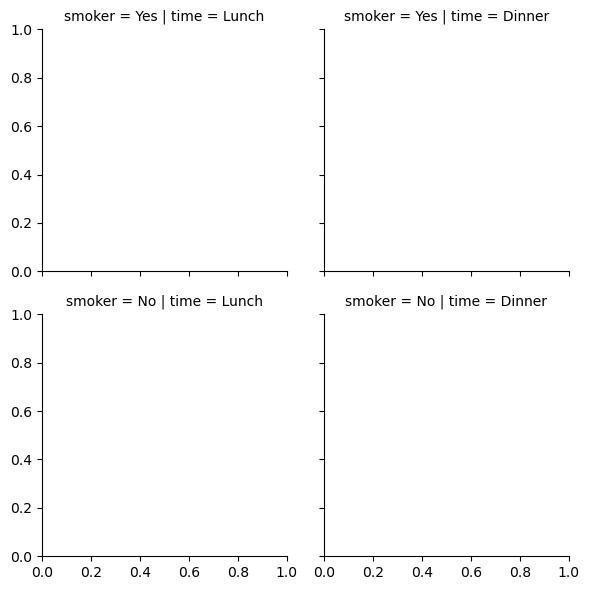

In [51]:
# 기본적인 판 만들기
g = sns.FacetGrid(tips, col='time', row='smoker')

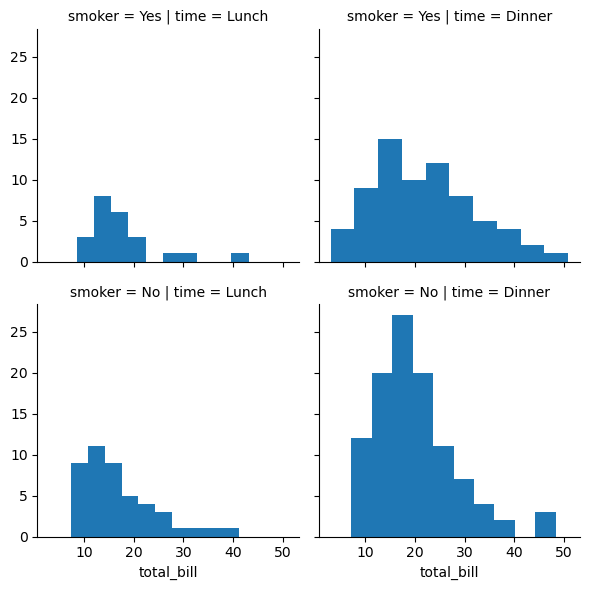

In [52]:
# total_bill의 값을 가지고 히스토그램 그리기
g = sns.FacetGrid(tips, col='time', row='smoker')
g = g.map(plt.hist, "total_bill")

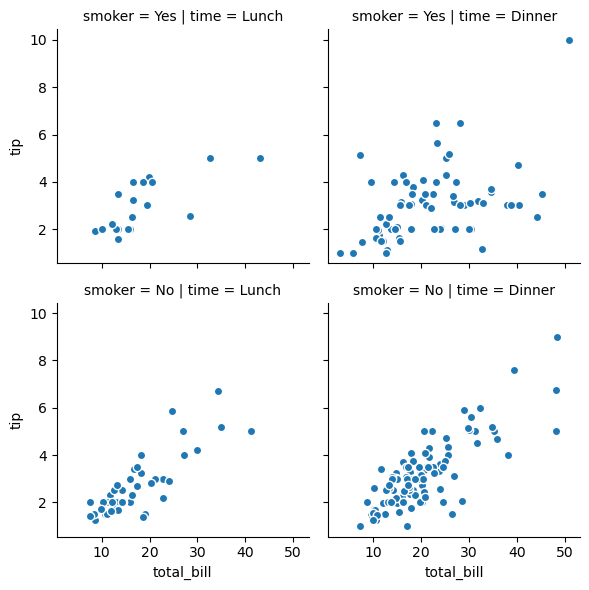

In [54]:
g = sns.FacetGrid(tips, col='time', row='smoker')
g = g.map(plt.scatter, "total_bill", "tip", edgecolor = 'w')

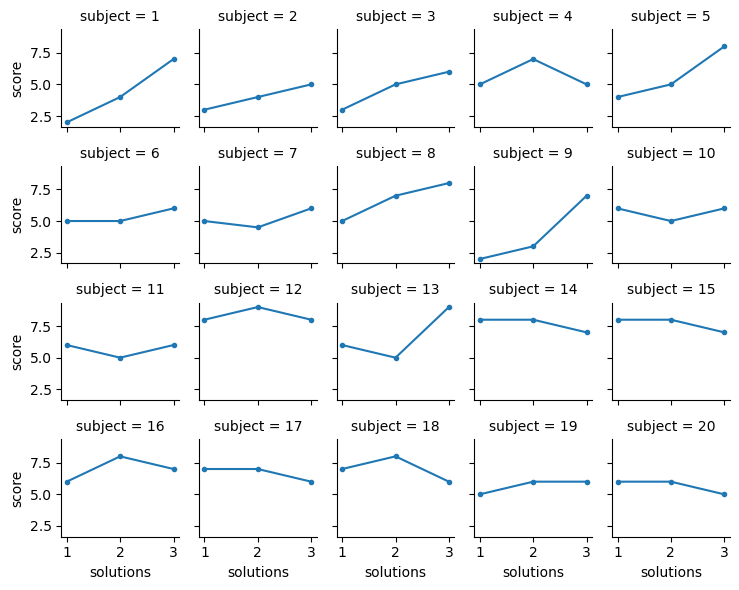

In [56]:
# solution에 따른 score
att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col='subject', col_wrap=5, height = 1.5)
g = g.map(plt.plot, "solutions", "score", marker = '.')

## pairplot - 데이터 간의 상관관계 표시

- 데이터에 들어 있는 각 컬럼(열)들의 모든 상관 관계를 출력

In [58]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


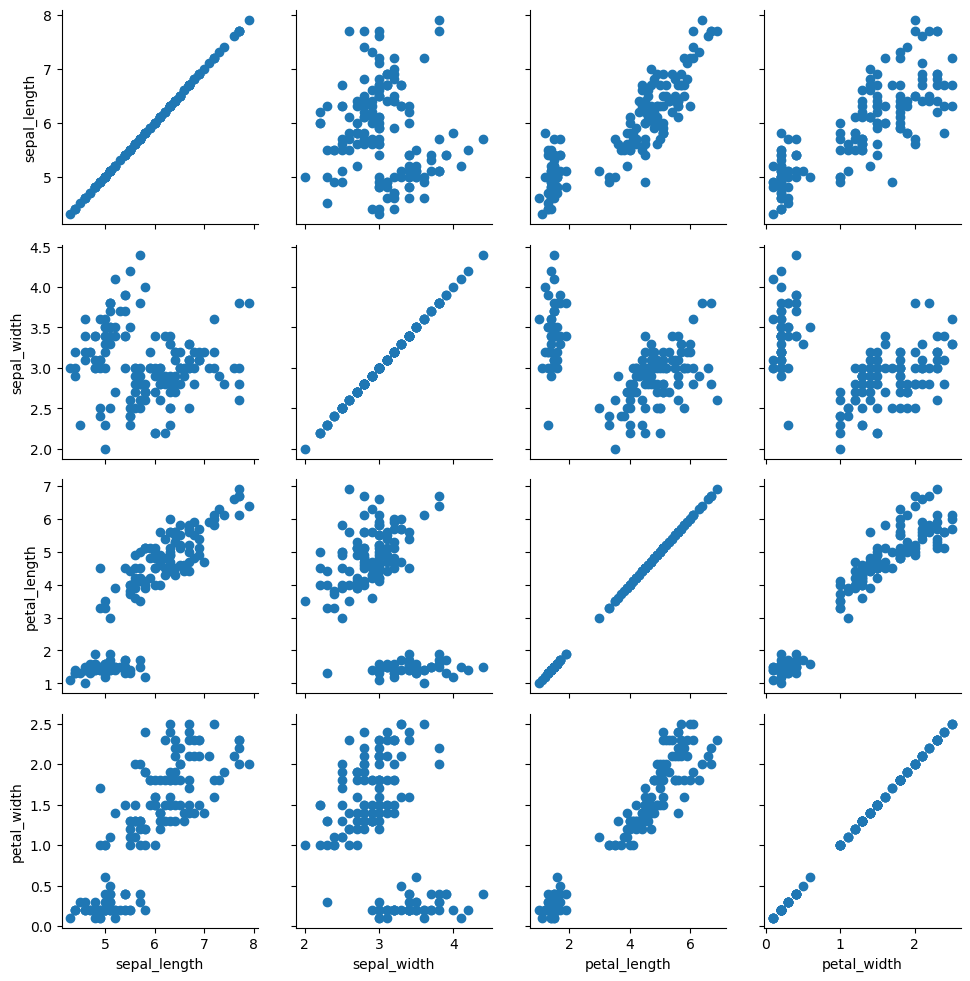

In [57]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)

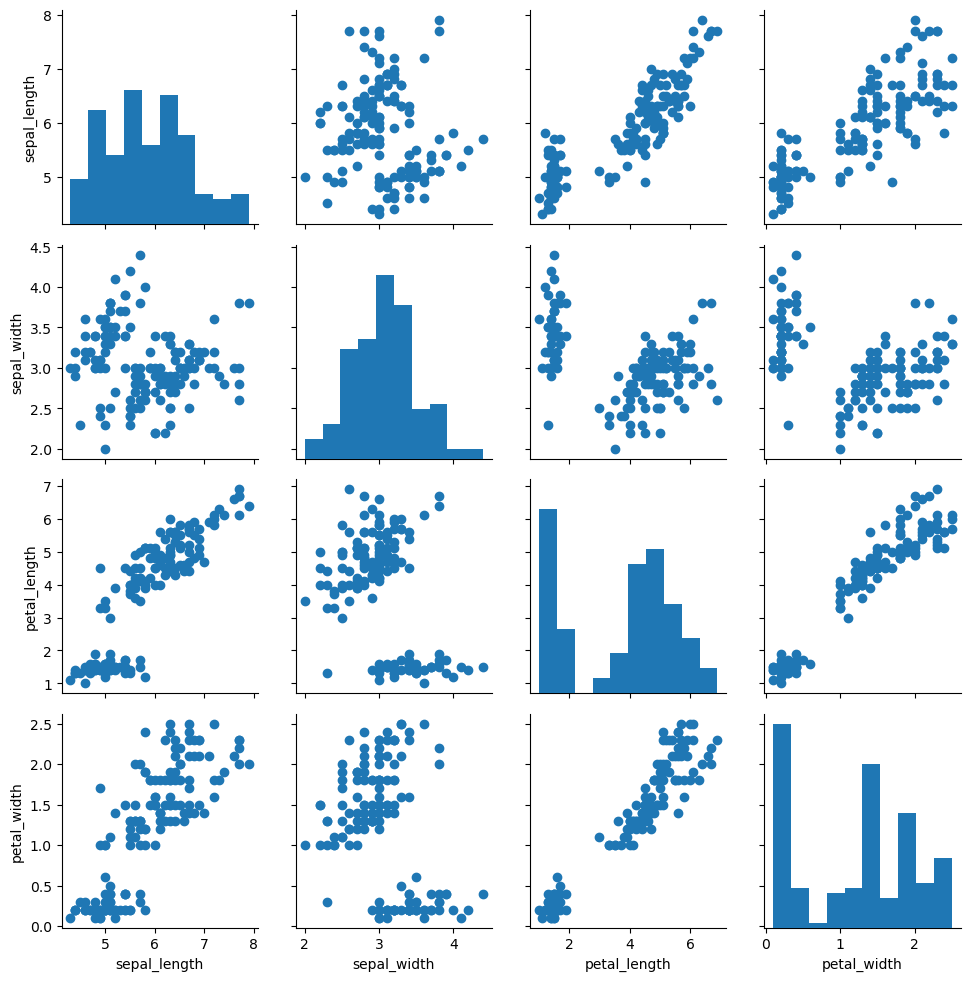

In [60]:
# diag로 지정된 것에만 hist로 그려주고 나머지에는 scatter로 그려줌
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

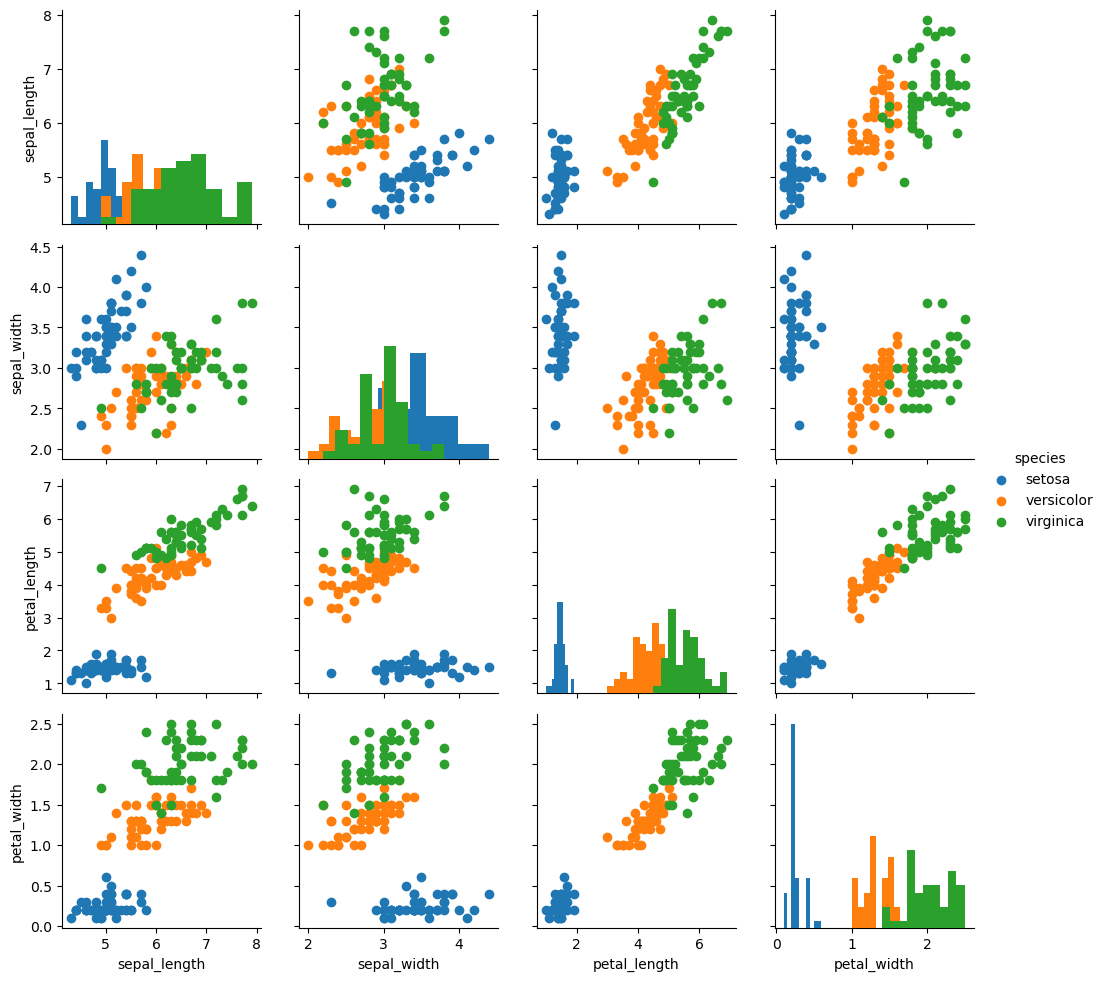

In [62]:
g = sns.PairGrid(iris, hue = 'species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

## lmplot - regression 모델과 category 데이터를 함께 표시

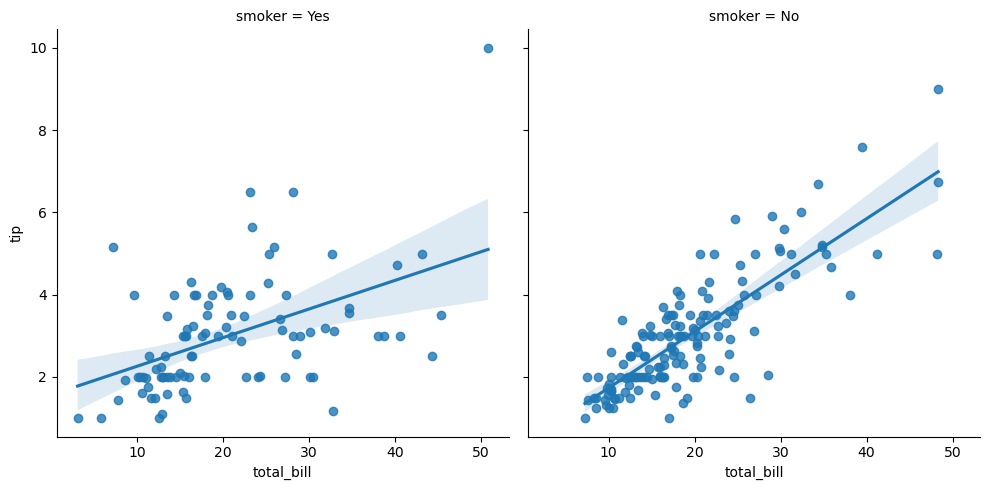

In [63]:
sns.lmplot(x = 'total_bill', y = "tip", col='smoker', data=tips)

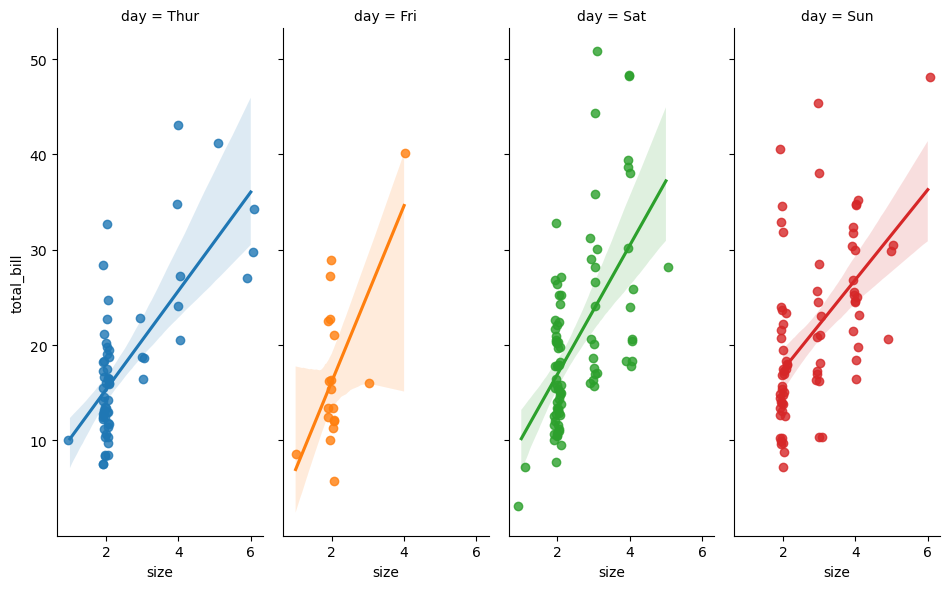

In [64]:
g = sns.lmplot(x='size', y='total_bill', hue='day', col='day',
              data=tips, height=6, aspect=.4, x_jitter=.1)